In [1]:
#syncronise with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Loading

In [25]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BADA/group project/final_df.csv', parse_dates=True, index_col=0)
df.index = pd.to_datetime(df.index)
df.head(2)


<ipython-input-25-b629bd6db9c7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BADA/group project/final_df.csv', parse_dates=True, index_col=0)


,Hour,Little Collins St-Swanston St (East),Faraday St-Lygon St (West),Melbourne Central,Chinatown-Lt Bourke St (South),Lonsdale St (South),Lygon St (West),IsPublicHoliday,temp,humidity,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Season_Spring,Season_Summer,Season_Winter
2022-01-04 00:00:00,0,166,24,380,73,215,48,0,16.90,59,...,0,0,0,0,0,0,0,1,0,0
2022-01-04 01:00:00,1,108,9,198,79,156,11,0,17.28,58,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Split data into training and testing sets
train = df[df.index < "2024-05-01"]
test = df[df.index >= "2024-05-01"]

#Exponentional Smoothing for Little Collins St-Swanston St (East)

In [27]:
# Fit the Exponential Smoothing model
model = ExponentialSmoothing(train['Little Collins St-Swanston St (East)'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [41]:
# Make predictions on the test set using the test set's index
predictions = pd.Series(fit_model.forecast(len(test)), index=test.index)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


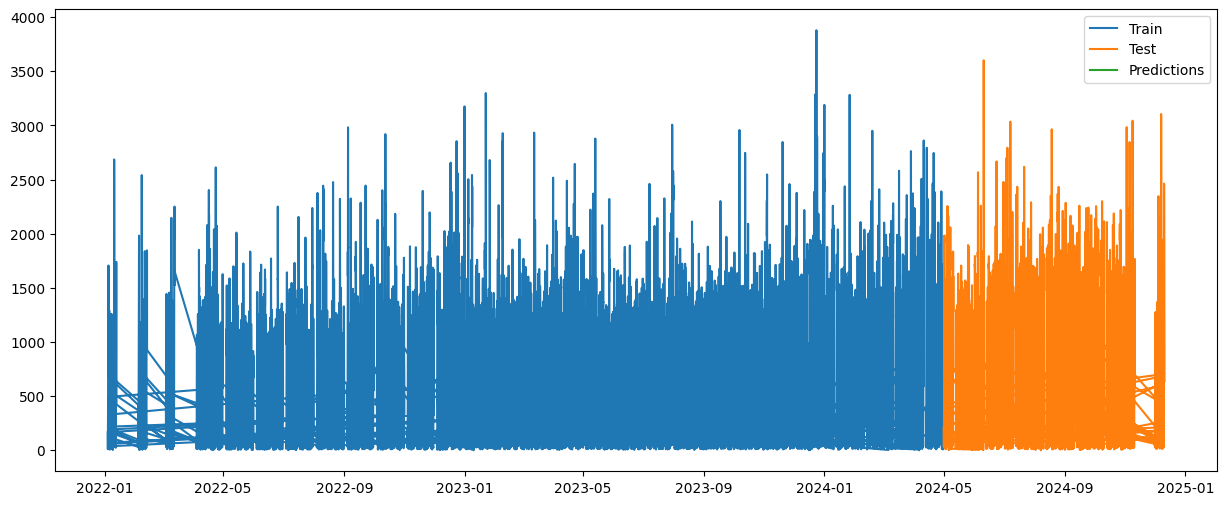

In [42]:
# Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(train['Little Collins St-Swanston St (East)'], label='Train')
plt.plot(test['Little Collins St-Swanston St (East)'], label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

In [43]:
predictions.head()

,0
2024-05-01 00:00:00,NaN
2024-05-01 01:00:00,NaN
2024-05-01 02:00:00,NaN
2024-05-01 03:00:00,NaN
2024-05-01 04:00:00,NaN
